In [1]:
from process_data import *
from keras.models import Sequential
from keras.models import Model
from keras.layers.core import Dense, Dropout, Activation, Flatten, Permute
from keras.layers import Merge, Input, concatenate, average, add
from keras.layers.recurrent import LSTM, GRU
from keras.layers import Convolution1D, MaxPooling1D, AtrousConvolution1D, RepeatVector, AveragePooling1D
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, CSVLogger
from keras.layers.wrappers import Bidirectional, TimeDistributed
from keras import regularizers
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import *
from keras.optimizers import RMSprop, Adam, SGD, Nadam
from keras.initializers import *
from keras.constraints import *
from keras import regularizers
from keras import losses
import matplotlib.pyplot as plt
from keras.utils import plot_model
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SyntaxError: invalid syntax (<ipython-input-1-23a8840e893e>, line 1)

In [2]:
main_input = Input(shape=(30, 5), name='ts_input')
text_input = Input(shape=(30, 100), name='text_input')
lstm1 = LSTM(10, return_sequences=True, recurrent_dropout=0.25, dropout=0.25, bias_initializer='ones')(main_input)
lstm1 = LSTM(10, return_sequences=True, recurrent_dropout=0.25, dropout=0.25, bias_initializer='ones')(lstm1)
lstm1 = Flatten()(lstm1)
lstm2 = LSTM(10, return_sequences=True, recurrent_dropout=0.25, dropout=0.25, bias_initializer='ones')(text_input)
lstm2 = LSTM(10, return_sequences=True, recurrent_dropout=0.25, dropout=0.25, bias_initializer='ones')(lstm2)
lstm2 = Flatten()(lstm2)


lstms = concatenate([lstm1, lstm2])


x1 = Dense(64)(lstms)
x1 = LeakyReLU()(x1)
x1 = Dense(1, activation = 'linear', name='regression')(x1)

x2 = Dense(64)(lstms)
x2 = LeakyReLU()(x2)
x2 = Dropout(0.9)(x2)
x2 = Dense(1, activation = 'sigmoid', name = 'class')(x2)

final_model = Model(inputs=[main_input, text_input], 
              outputs=[x1, x2])

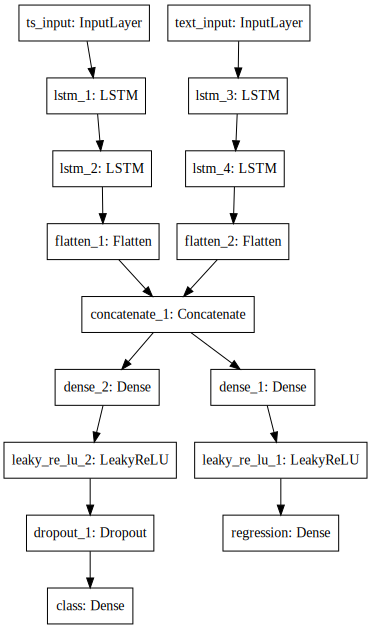

In [3]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))